# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [153]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np #numerical computations. large, multi-dimensional arrays and matrices
import pandas as pd #data manipulation and analysis
import matplotlib.pyplot as plt #
from statsmodels.graphics.correlation import plot_corr
import seaborn as sns #data visualization library provides a high-level interface for creating statistical graphics
import random
from IPython.display import display, Image
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Libraries for data preparation and model building
import numpy as np 
import pandas as pd
#import tensorflow as tf
from sklearn.linear_model import LogisticRegression #work with a classification algorithm like Logistic Regression
import statsmodels.api as sm



# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 0

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [154]:
df = pd.read_csv('./df_test.csv') #Load the train CSV file into a pandas DataFrame

## Cleaning Data

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [155]:
df

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,...,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,...,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,...,289.483333,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,...,285.816667,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---
# View the first 10 rows of the DataFrame
df.head(10)

In [156]:
df.shape

(2920, 48)

Observations: 8763 rows and 49 columns
There is one unnamed column to be dropped in data engineering section

In [157]:
# look at data statistics
df.describe() 

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,...,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,10222.500000,2.457820,0.067517,3.012785,67.123516,62.644463,43.355422,2.283562,15.477283,162.643836,...,290.695462,288.888393,289.911289,284.920684,286.522375,289.124971,288.483641,290.152431,287.869763,286.618130
std,843.075718,1.774838,0.153381,1.996340,20.611292,24.138393,30.486298,1.654787,25.289197,97.749873,...,7.113599,9.089699,7.119411,6.803424,6.492355,7.168049,6.221324,7.906915,8.977511,8.733163
min,8763.000000,0.000000,0.000000,0.000000,11.666667,8.000000,0.000000,0.000000,0.000000,0.000000,...,273.816667,269.816667,272.650000,266.483333,268.120000,271.483333,270.138667,271.150000,268.713333,267.816667
25%,9492.750000,1.333333,0.000000,1.666667,52.000000,43.000000,13.333333,1.000000,0.000000,86.666667,...,284.816667,281.483333,284.307500,280.150000,281.778333,283.483333,284.150000,284.483333,280.816667,279.816667
50%,10222.500000,2.000000,0.000000,2.333333,70.333333,63.000000,45.000000,1.666667,0.000000,140.000000,...,290.150000,287.483333,289.483333,284.483333,286.265000,288.816667,288.483333,289.150000,286.396667,285.483333
75%,10952.250000,3.333333,0.000000,4.000000,85.000000,84.000000,75.000000,3.333333,20.000000,233.333333,...,296.483333,295.483333,295.816667,289.816667,291.119167,295.150000,292.816667,295.150000,294.452500,293.150000
max,11682.000000,13.333333,1.600000,14.333333,100.000000,100.000000,97.333333,10.666667,93.333333,360.000000,...,309.483333,313.483333,308.150000,307.483333,308.966667,306.816667,310.816667,314.483333,312.223333,310.150000


In [158]:
df.info() #The info command confirms our categorical and numerical features. outputs the number of non-null entries in each column.
#As such, we can be certain that our data has missing values if columns have a varying number of non-null entries.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Valencia_wind_deg     2920 non-null   object 
 4   Bilbao_rain_1h        2920 non-null   float64
 5   Valencia_wind_speed   2920 non-null   float64
 6   Seville_humidity      2920 non-null   float64
 7   Madrid_humidity       2920 non-null   float64
 8   Bilbao_clouds_all     2920 non-null   float64
 9   Bilbao_wind_speed     2920 non-null   float64
 10  Seville_clouds_all    2920 non-null   float64
 11  Bilbao_wind_deg       2920 non-null   float64
 12  Barcelona_wind_speed  2920 non-null   float64
 13  Barcelona_wind_deg    2920 non-null   float64
 14  Madrid_clouds_all     2920 non-null   float64
 15  Seville_wind_speed   



time, Valencia_wind_deg, and Seville are object types, hence, are non-numeric which may have to be changed in data engineering section. 

In [159]:
df.isnull().sum() #provide the total number of null values appearing in each feature. basically opposite of df.info

Unnamed: 0                0
time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp        

In [160]:
#find collumns with nulls and store the index as variable called column_iloc

null_mask = df.isnull().any()
columns_with_nulls = null_mask[null_mask].index

null_column_iloc = df.columns.get_loc(columns_with_nulls[0])

### Univariate Analysis: Non-Graphical

In [161]:
#find the percentage of null values for collumn with nulls

null_percentage = (df.iloc[:, null_column_iloc].isnull().sum() / len(df)) * 100
print(f"Percentage of null values in '{null_column_iloc}': {null_percentage:.2f}%")

Percentage of null values in '29': 15.55%


In [162]:
# Calculate the median of the column
df.iloc[:, null_column_iloc].median()

1014.6666666667

In [163]:
#verifiying the statistic summaries of the null column

df.iloc[:, null_column_iloc].describe()

count    2466.000000
mean     1013.148351
std         6.528997
min       973.000000
25%      1010.666667
50%      1014.666667
75%      1017.666667
max      1021.666667
Name: Valencia_pressure, dtype: float64

In [164]:
# descriptive statistics of each numerical feature by using the following command:

df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,...,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,10222.500000,2.457820,0.067517,3.012785,67.123516,62.644463,43.355422,2.283562,15.477283,162.643836,...,290.695462,288.888393,289.911289,284.920684,286.522375,289.124971,288.483641,290.152431,287.869763,286.618130
std,843.075718,1.774838,0.153381,1.996340,20.611292,24.138393,30.486298,1.654787,25.289197,97.749873,...,7.113599,9.089699,7.119411,6.803424,6.492355,7.168049,6.221324,7.906915,8.977511,8.733163
min,8763.000000,0.000000,0.000000,0.000000,11.666667,8.000000,0.000000,0.000000,0.000000,0.000000,...,273.816667,269.816667,272.650000,266.483333,268.120000,271.483333,270.138667,271.150000,268.713333,267.816667
25%,9492.750000,1.333333,0.000000,1.666667,52.000000,43.000000,13.333333,1.000000,0.000000,86.666667,...,284.816667,281.483333,284.307500,280.150000,281.778333,283.483333,284.150000,284.483333,280.816667,279.816667
50%,10222.500000,2.000000,0.000000,2.333333,70.333333,63.000000,45.000000,1.666667,0.000000,140.000000,...,290.150000,287.483333,289.483333,284.483333,286.265000,288.816667,288.483333,289.150000,286.396667,285.483333
75%,10952.250000,3.333333,0.000000,4.000000,85.000000,84.000000,75.000000,3.333333,20.000000,233.333333,...,296.483333,295.483333,295.816667,289.816667,291.119167,295.150000,292.816667,295.150000,294.452500,293.150000
max,11682.000000,13.333333,1.600000,14.333333,100.000000,100.000000,97.333333,10.666667,93.333333,360.000000,...,309.483333,313.483333,308.150000,307.483333,308.966667,306.816667,310.816667,314.483333,312.223333,310.150000


will replace Valencia_pressure null values with median Value if the nulls encompass less than 30% of the whole column

In [165]:
df.mode()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,1.0,level_8,0.0,1.333333,93.0,100.0,75.0,1.0,...,295.15,281.15,287.983333,280.15,281.93,286.15,284.15,288.15,281.15,280.15
1,8764,2018-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,288.650000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8765,2018-01-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8766,2018-01-01 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8767,2018-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,11678,2018-12-31 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2916,11679,2018-12-31 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2917,11680,2018-12-31 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2918,11681,2018-12-31 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
#Additional statistical measures that can be calculated are kurtosis and skew.
df.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.494269
Bilbao_rain_1h           3.404307
Valencia_wind_speed      1.328872
Seville_humidity        -0.508637
Madrid_humidity         -0.135537
Bilbao_clouds_all       -0.124933
Bilbao_wind_speed        1.381876
Seville_clouds_all       1.628723
Bilbao_wind_deg          0.322569
Barcelona_wind_speed     1.080200
Barcelona_wind_deg      -0.029036
Madrid_clouds_all        0.925034
Seville_wind_speed       1.346297
Barcelona_rain_1h        5.989675
Seville_rain_1h          6.269205
Bilbao_snow_3h           0.000000
Barcelona_pressure      -0.572509
Seville_rain_3h         54.037024
Madrid_rain_1h           5.211963
Barcelona_rain_3h       40.017330
Valencia_snow_3h         0.000000
Madrid_weather_id       -2.439600
Barcelona_weather_id    -2.577583
Bilbao_pressure         -0.952458
Seville_weather_id      -3.103741
Valencia_pressure       -1.779108
Seville_temp_max         0.473503
Madrid_pressure         -2.608926
Valencia_temp_

In [167]:
# Provide the image path as an argument to the Image class

# display(Image(filename="Skew.png"))

Entries with high negative skew are: Valencia_pressure, Madrid_pressure, (and Bilbao_weather_id, Madrid_weather_id and Barcelona_weather_id). Those with high positive skew are: Bilbao_rain_1h, Valencia_wind_speed, Bilbao_snow_3h, Seville_rain_3h, Barcelona_pressure, Seville_rain_3h, Madrid_rain_1h, Barcelona_rain_3h, Valencia_snow_3h)

In [168]:
#High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3) a lack of outliers
df.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.567383
Bilbao_rain_1h            16.905396
Valencia_wind_speed        2.100244
Seville_humidity          -0.710306
Madrid_humidity           -1.134569
Bilbao_clouds_all         -1.488942
Bilbao_wind_speed          2.306390
Seville_clouds_all         1.417797
Bilbao_wind_deg           -1.017392
Barcelona_wind_speed       1.410571
Barcelona_wind_deg        -0.956300
Madrid_clouds_all         -0.566527
Seville_wind_speed         2.369604
Barcelona_rain_1h         52.069367
Seville_rain_1h           48.243445
Bilbao_snow_3h             0.000000
Barcelona_pressure         1.175366
Seville_rain_3h         2920.000000
Madrid_rain_1h            41.250278
Barcelona_rain_3h       1642.238858
Valencia_snow_3h           0.000000
Madrid_weather_id          5.349404
Barcelona_weather_id       6.056749
Bilbao_pressure            1.866927
Seville_weather_id         9.557456
Valencia_pressure          4.966557
Seville_temp_max          -0

Features with high kurtosis i.e. >3, implying a large number of outliers are: Bilbao_rain_1h, Valencia_wind_speed, Barcelona_rain_1h, Seville_rain_1h, Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, Valencia_snow_3h, (Madrid_weather_id, Barcelona_weather_id, Seville_weather_id, are IDs relevant in distribution study)

Units are not provided, however, a pressure of 3687.564230 for Barcelona would not be representative of weather conditions on earth, atmospheric pressure is typically 1013 hPa. This value would potentially be dropped or replaced in data engineering. 

This is also the case for the recorded value for Valencia_snow_3h as 4089.323165 (centimetres or inches) is not a realistic recording for snowfall especially in 3h. 

Furthermore, it is highly unlikely for it to rain 413 millimeters (mm) in just 3 hours under normal weather conditions as the rate of rainfall is often expressed in terms of millimeters per hour (mm/hr). A very heavy rainfall rate might be in the range of 50 to 100 mm/hr during an intense thunderstorm or a severe rainfall event. 

Entries with high skewness often correspond with values with high kurtosis indicating non-normally distributed. These entries would either be replaced or dropped in data emgineering section. 

In [169]:
# plot relevant feature interactions

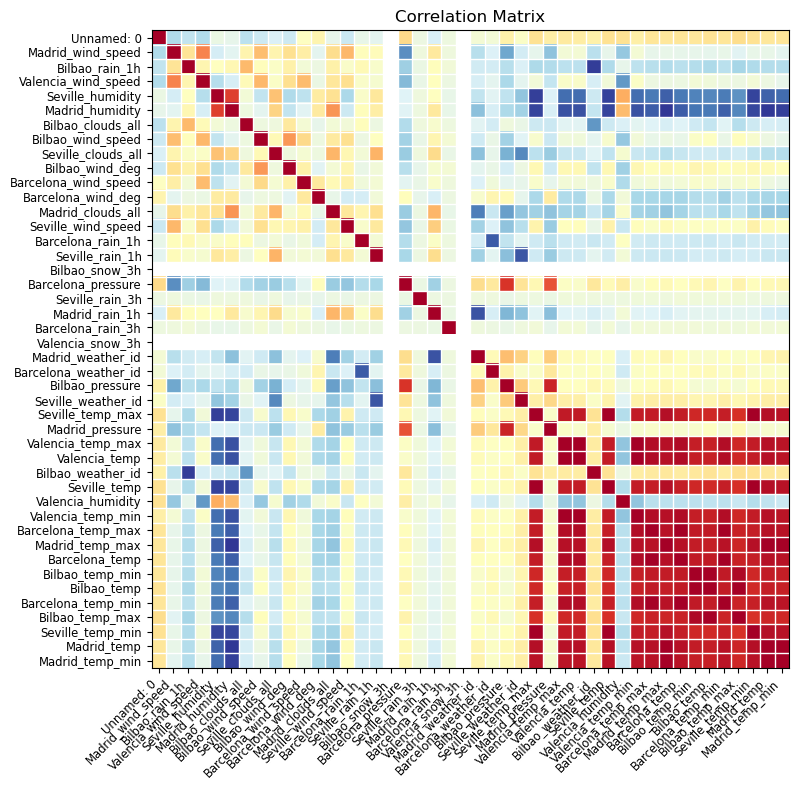

In [170]:
#evaluate correlation
corr = df.drop('Valencia_pressure', axis='columns').corr()
fig, ax = plt.subplots(figsize=(10, 8))  
plot_corr(corr, xnames=corr.columns, ax=ax)
plt.show()


Strongest correlations, and therefore, most influential features on energy production are min/max temperature of the cities. Wind speed, wind degrees, pressure, rain, snow and cloud cover have less influence (bottom right correlations in matrix)

In [188]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

Mean: You should consider using the mean (average) to replace null values when your data is approximately normally distributed. This means that the data is symmetric and bell-shaped. The mean can be sensitive to extreme outliers, so if your data has significant outliers, it might not be the best choice.

Median: The median is a robust statistic that is less affected by extreme values or outliers. You should consider using the median to replace null values when your data is skewed or has outliers. If your data has a non-normal distribution, the median can be a more representative measure of central tendency.

In [172]:
# Convert 'time' to datetime type
df['time'] = pd.to_datetime(df['time'])

#SANITY CHECK
print(df.dtypes)

Unnamed: 0                       int64
time                    datetime64[ns]
Madrid_wind_speed              float64
Valencia_wind_deg               object
Bilbao_rain_1h                 float64
Valencia_wind_speed            float64
Seville_humidity               float64
Madrid_humidity                float64
Bilbao_clouds_all              float64
Bilbao_wind_speed              float64
Seville_clouds_all             float64
Bilbao_wind_deg                float64
Barcelona_wind_speed           float64
Barcelona_wind_deg             float64
Madrid_clouds_all              float64
Seville_wind_speed             float64
Barcelona_rain_1h              float64
Seville_pressure                object
Seville_rain_1h                float64
Bilbao_snow_3h                   int64
Barcelona_pressure             float64
Seville_rain_3h                float64
Madrid_rain_1h                 float64
Barcelona_rain_3h              float64
Valencia_snow_3h                 int64
Madrid_weather_id        

In [173]:
#replace nulls with median based on percentage nulls

if null_percentage < 30:
    median_value = df.iloc[:, null_column_iloc].median()
    df.iloc[:, null_column_iloc].fillna(median_value, inplace=True)
else:
    df.drop(columns_with_nulls, axis=1, inplace=True)

In [174]:
#SANITY CHECK

df.isnull().sum()

Unnamed: 0              0
time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_te

In [175]:
# your_data_list = df[:, null_column_iloc].tolist()

In [176]:
#Remove Duplicates
# df = df.drop_duplicates() 

In [177]:
# Find the "unnamed" column by checking its name
# unnamed_columns = [col for col in df.columns if 'unnamed' in col.lower()]

# Drop the "unnamed" column(s)
# df.drop(columns=unnamed_columns, inplace=True)

# If you want to save the modified DataFrame back to a file
# df.to_csv('modified_data.csv', index=False)  # Replace 'modified_data.csv' with the desired file name


In [178]:
# create new features
#Temperate range
# df['temp_range'] = df['Madrid_temp_max'] - df['Madrid_temp_min']
# df['temp_range'] = df['Valencia_temp_max'] - df['Valencia_temp_min']
# df['temp_range'] = df['Seville_temp_max'] - df['Seville_temp_min']
# df['temp_range'] = df['Bilbao_temp_max'] - df['Bilbao_temp_min']
# df['temp_range'] = df['Barcelona_temp_max'] - df['Barcelona_temp_min']
# print(df[['Madrid_temp_range', 'Valencia_temp_range', 'Seville_temp_range', 'Bilbao_temp_range', 'Barcelona_temp_range']].head())

df['Madrid_temp_range'] = df['Madrid_temp_max'] - df['Madrid_temp_min']
df['Valencia_temp_range'] = df['Valencia_temp_max'] - df['Valencia_temp_min']
df['Seville_temp_range'] = df['Seville_temp_max'] - df['Seville_temp_min']
df['Bilbao_temp_range'] = df['Bilbao_temp_max'] - df['Bilbao_temp_min']
df['Barcelona_temp_range'] = df['Barcelona_temp_max'] - df['Barcelona_temp_min']

print(df[['Madrid_temp_range', 'Valencia_temp_range', 'Seville_temp_range', 'Bilbao_temp_range', 'Barcelona_temp_range']].head())
#Cloud cover
#Solar Intensity: The intensity of sunlight is a key factor. 
#On a bright, sunny day, with high solar intensity, solar panels will heat up more quickly than on a 
#cloudy or overcast day with lower solar intensity

   Madrid_temp_range  Valencia_temp_range  Seville_temp_range  \
0           1.666667                  0.0            1.333333   
1           2.333333                  0.0            1.333333   
2           0.333333                  0.0            0.333333   
3           2.666667                  0.0            2.000000   
4           1.000000                  0.0            2.666667   

   Bilbao_temp_range  Barcelona_temp_range  
0           9.000000              1.000000  
1           6.333333              1.333333  
2           5.333333              2.666667  
3           5.333333              2.000000  
4           5.000000              1.333333  


In [179]:
# engineer existing features
df

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Madrid_temp_range,Valencia_temp_range,Seville_temp_range,Bilbao_temp_range,Barcelona_temp_range
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,286.816667,285.150000,283.150000,279.866667,279.150000,1.666667,0.000000,1.333333,9.000000,1.000000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,283.483333,284.150000,281.150000,279.193333,278.150000,2.333333,0.000000,1.333333,6.333333,1.333333
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,281.816667,282.150000,280.483333,276.340000,276.150000,0.333333,0.000000,0.333333,5.333333,2.666667
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,282.150000,284.483333,279.150000,275.953333,274.483333,2.666667,0.000000,2.000000,5.333333,2.000000
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,286.150000,286.816667,284.483333,280.686667,280.150000,1.000000,0.000000,2.666667,5.000000,1.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,...,276.483333,276.150000,279.816667,274.910000,271.150000,10.333333,1.000000,1.000000,5.333333,3.333333
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,...,285.816667,278.816667,287.150000,283.156667,280.483333,7.333333,1.000000,0.333333,0.666667,0.666667
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,...,288.150000,285.816667,290.816667,287.733333,286.483333,2.333333,0.000000,0.000000,1.666667,1.333333
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,...,283.150000,282.816667,287.483333,283.813333,282.150000,3.000000,1.000000,1.333333,2.666667,2.666667


In [180]:
# have a look at feature distributions


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [181]:
# split data

In [182]:
# create targets and features dataset

In [183]:
# create one or more ML models

In [184]:
# evaluate one or more ML models
#model accuracy: variable selection notebook

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [185]:
# Compare model performance

In [186]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [187]:
# discuss chosen methods logic